In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

In [113]:
# pip install pandas_profiling

In [114]:
import random
from feature_engine.selection import DropCorrelatedFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
import xgboost as xgb
from xgboost import XGBClassifier
import pandas_profiling
from sklearn.ensemble import RandomForestClassifier

In [115]:
pd.options.display.max_rows=1000
pd.options.display.max_columns=1000

# Load in the data

In [116]:
df=pd.read_excel('Credit_Data.xls')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              1000 non-null   int64
 1   CHK_ACCT          1000 non-null   int64
 2   DURATION          1000 non-null   int64
 3   HISTORY           1000 non-null   int64
 4   NEW_CAR           1000 non-null   int64
 5   USED_CAR          1000 non-null   int64
 6   FURNITURE         1000 non-null   int64
 7   RADIO/TV          1000 non-null   int64
 8   EDUCATION         1000 non-null   int64
 9   RETRAINING        1000 non-null   int64
 10  AMOUNT            1000 non-null   int64
 11  SAV_ACCT          1000 non-null   int64
 12  EMPLOYMENT        1000 non-null   int64
 13  INSTALL_RATE      1000 non-null   int64
 14  MALE_DIV          1000 non-null   int64
 15  MALE_SINGLE       1000 non-null   int64
 16  MALE_MAR_or_WID   1000 non-null   int64
 17  CO-APPLICANT      1000 non-null   

OBS#     CHK_ACCT     DURATION     HISTORY      NEW_CAR  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean    500.500000     1.577000    20.903000     2.54500     0.234000   
std     288.819436     1.257638    12.058814     1.08312     0.423584   
min       1.000000     0.000000     4.000000     0.00000     0.000000   
25%     250.750000     0.000000    12.000000     2.00000     0.000000   
50%     500.500000     1.000000    18.000000     2.00000     0.000000   
75%     750.250000     3.000000    24.000000     4.00000     0.000000   
max    1000.000000     3.000000    72.000000     4.00000     1.000000   

          USED_CAR    FURNITURE     RADIO/TV    EDUCATION   RETRAINING  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.103000     0.181000     0.280000     0.050000     0.097000   
std       0.304111     0.385211     0.449224     0.218054     0.296106   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             AMOUNT     SAV_ACCT   EMPLOYMENT  INSTALL_RATE     MALE_DIV  \
count   1000.000000  1000.000000  1000.000000   1000.000000  1000.000000   
mean    3271.258000     1.105000     2.384000      2.973000     0.050000   
std     2822.736876     1.580023     1.208306      1.118715     0.218054   
min      250.000000     0.000000     0.000000      1.000000     0.000000   
25%     1365.500000     0.000000     2.000000      2.000000     0.000000   
50%     2319.500000     0.000000     2.000000      3.000000     0.000000   
75%     3972.250000     2.000000     4.000000      4.000000     0.000000   
max    18424.000000     4.000000     4.000000      4.000000     1.000000   

       MALE_SINGLE  MALE_MAR_or_WID  CO-APPLICANT    GUARANTOR  \
count   1000.00000      1000.000000   1000.000000  1000.000000   
mean       0.54800         0.092000      0.041000     0.052000   
std        0.49794         0.289171      0.198389     0.222138   
min        0.00000         0.000000      0.000000     0.000000   
25%        0.00000         0.000000      0.000000     0.000000   
50%        1.00000         0.000000      0.000000     0.000000   
75%        1.00000         0.000000      0.000000     0.000000   
max        1.00000         1.000000      1.000000     1.000000   

       PRESENT_RESIDENT  REAL_ESTATE  PROP_UNKN_NONE          AGE  \
count       1000.000000  1000.000000     1000.000000  1000.000000   
mean           2.845000     0.282000        0.154000    35.546000   
std            1.103718     0.450198        0.361129    11.375469   
min            1.000000     0.000000        0.000000    19.000000   
25%            2.000000     0.000000        0.000000    27.000000   
50%            3.000000     0.000000        0.000000    33.000000   
75%            4.000000     1.000000        0.000000    42.000000   
max            4.000000     1.000000        1.000000    75.000000   

       OTHER_INSTALL         RENT      OWN_RES  NUM_CREDITS          JOB  \
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean        0.186000     0.179000     0.713000     1.407000     1.904000   
std         0.389301     0.383544     0.452588     0.577654     0.653614   
min         0.000000     0.000000     0.000000     1.000000     0.000000   
25%         0.000000     0.000000     0.000000     1.000000     2.000000   
50%         0.000000     0.000000     1.000000     1.000000     2.000000   
75%         0.000000     0.000000     1.000000     2.000000     2.000000   
max         1.000000     1.000000     1.000000     4.000000     3.000000   

       NUM_DEPENDENTS    TELEPHONE      FOREIGN      DEFAULT  
count     1000.000000  1000.000000  100

In [117]:
df

OBS#  CHK_ACCT  DURATION  HISTORY  NEW_CAR  USED_CAR  FURNITURE  \
0       1         0         6        4        0         0          0   
1       2         1        48        2        0         0          0   
2       3         3        12        4        0         0          0   
3       4         0        42        2        0         0          1   
4       5         0        24        3        1         0          0   
5       6         3        36        2        0         0          0   
6       7         3        24        2        0         0          1   
7       8         1        36        2        0         1          0   
8       9         3        12        2        0         0          0   
9      10         1        30        4        1         0          0   
10     11         1        12        2        1         0          0   
11     12         0        48        2        0         0          0   
12     13         1        12        2        0         0          0   
13     14         0        24        4        1         0          0   
14     15         0        15        2        1         0          0   
15     16         0        24        2        0         0          0   
16     17         3        24        4        0         0          0   
17     18         0        30        0        0         0          0   
18     19         1        24        2        0         1          0   
19     20         3        24        2        0         0          0   
20     21         3         9        4        1         0          0   
21     22         0         6        2        0         0          0   
22     23         0        10        4        1         0          0   
23     24         1        12        4        0         1          0   
24     25         3        10        4        0         0          1   
25     26         0         6        2        0         0          1   
26     27         3         6        0        0         0          0   
27     28         2        12        1        0         0          0   
28     29         1         7        2        0         0          0   
29     30         0        60        3        0         0          0   
30     31         1        18        2        0         0          0   
31     32         0        24        2        0         0          1   
32     33         1        18        2        1         0          0   
33     34         3        12        4        0         0          0   
34     35         2        12        2        0         0          1   
35     36         1        45        4        0         0          0   
36     37         3        48        4        0         0          0   
37     38         2        18        2        0         0          0   
38     39         2        10        2        0         0          0   
39     40         1         9        2        0         0          0   
40     41         3        30        2        0         0          0   
41     42         1        12        2        0         0          0   
42     43         1        18        3        0         0          0   
43     44         0        30        4        0         1          0   
44     45         0        48        4        0         1          0   
45     46         3        11        4        1         0          0   
46     47         3        36        2        0         0          0   
47     48         0         6        2        0         1          0   
48     49         3        11        4        1         0          0   
49     50         3        12        2        0         0          0   
50     51         1        24        3        0         0          1   
51     52         1        27        3        0         1          0   
52     53         3        12        2        0         0          0   
53     54         3        18        2        0         1          0   
54     55         1        36        3       

In [118]:
rate_default=df['DEFAULT'].sum()/df['DEFAULT'].count()
print('Default Rate:', rate_default)

Default Rate: 0.3


In [119]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [120]:
# sns.pairplot(df)

# Data quality check

In [121]:
print(df.isin([np.nan, np.inf, -np.inf]).sum().sum())
print(df.isna().sum().sum())
print(df.isnull().sum().sum())
print(df.max().max())
print(df.min().min())

0
0
0
18424
0


# Multicolinearity check

In [122]:
X = df
tr = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)
Xt = tr.fit_transform(X)
tr.correlated_feature_sets_
tr.features_to_drop_

set()

In [123]:
df_drop=Xt.drop(columns=['OBS#'])
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CHK_ACCT          1000 non-null   int64
 1   DURATION          1000 non-null   int64
 2   HISTORY           1000 non-null   int64
 3   NEW_CAR           1000 non-null   int64
 4   USED_CAR          1000 non-null   int64
 5   FURNITURE         1000 non-null   int64
 6   RADIO/TV          1000 non-null   int64
 7   EDUCATION         1000 non-null   int64
 8   RETRAINING        1000 non-null   int64
 9   AMOUNT            1000 non-null   int64
 10  SAV_ACCT          1000 non-null   int64
 11  EMPLOYMENT        1000 non-null   int64
 12  INSTALL_RATE      1000 non-null   int64
 13  MALE_DIV          1000 non-null   int64
 14  MALE_SINGLE       1000 non-null   int64
 15  MALE_MAR_or_WID   1000 non-null   int64
 16  CO-APPLICANT      1000 non-null   int64
 17  GUARANTOR         1000 non-null   

# Normalization

# Normalization all

In [124]:
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df_drop), columns=df_drop.columns)
df_norm

CHK_ACCT  DURATION  HISTORY  NEW_CAR  USED_CAR  FURNITURE  RADIO/TV  \
0    0.000000  0.029412     1.00      0.0       0.0        0.0       1.0   
1    0.333333  0.647059     0.50      0.0       0.0        0.0       1.0   
2    1.000000  0.117647     1.00      0.0       0.0        0.0       0.0   
3    0.000000  0.558824     0.50      0.0       0.0        1.0       0.0   
4    0.000000  0.294118     0.75      1.0       0.0        0.0       0.0   
5    1.000000  0.470588     0.50      0.0       0.0        0.0       0.0   
6    1.000000  0.294118     0.50      0.0       0.0        1.0       0.0   
7    0.333333  0.470588     0.50      0.0       1.0        0.0       0.0   
8    1.000000  0.117647     0.50      0.0       0.0        0.0       1.0   
9    0.333333  0.382353     1.00      1.0       0.0        0.0       0.0   
10   0.333333  0.117647     0.50      1.0       0.0        0.0       0.0   
11   0.000000  0.647059     0.50      0.0       0.0        0.0       0.0   
12   0.333333  0.117647     0.50      0.0       0.0        0.0       1.0   
13   0.000000  0.294118     1.00      1.0       0.0        0.0       0.0   
14   0.000000  0.161765     0.50      1.0       0.0        0.0       0.0   
15   0.000000  0.294118     0.50      0.0       0.0        0.0       1.0   
16   1.000000  0.294118     1.00      0.0       0.0        0.0       1.0   
17   0.000000  0.382353     0.00      0.0       0.0        0.0       0.0   
18   0.333333  0.294118     0.50      0.0       1.0        0.0       0.0   
19   1.000000  0.294118     0.50      0.0       0.0        0.0       1.0   
20   1.000000  0.073529     1.00      1.0       0.0        0.0       0.0   
21   0.000000  0.029412     0.50      0.0       0.0        0.0       1.0   
22   0.000000  0.088235     1.00      1.0       0.0        0.0       0.0   
23   0.333333  0.117647     1.00      0.0       1.0        0.0       0.0   
24   1.000000  0.088235     1.00      0.0       0.0        1.0       0.0   
25   0.000000  0.029412     0.50      0.0       0.0        1.0       0.0   
26   1.000000  0.029412     0.00      0.0       0.0        0.0       1.0   
27   0.666667  0.117647     0.25      0.0       0.0        0.0       1.0   
28   0.333333  0.044118     0.50      0.0       0.0        0.0       1.0   
29   0.000000  0.823529     0.75      0.0       0.0        0.0       0.0   
30   0.333333  0.205882     0.50      0.0       0.0        0.0       0.0   
31   0.000000  0.294118     0.50      0.0       0.0        1.0       0.0   
32   0.333333  0.205882     0.50      1.0       0.0        0.0       0.0   
33   1.000000  0.117647     1.00      0.0       0.0        0.0       0.0   
34   0.666667  0.117647     0.50      0.0       0.0        1.0       0.0   
35   0.333333  0.602941     1.00      0.0       0.0        0.0       1.0   
36   1.000000  0.647059     1.00      0.0       0.0        0.0       0.0   
37   0.666667  0.205882     0.50      0.0       0.0        0.0       1.0   
38   0.666667  0.088235     0.50      0.0       0.0        0.0       0.0   
39   0.333333  0.073529     0.50      0.0       0.0        0.0       1.0   
40   1.000000  0.382353     0.50      0.0       0.0        0.0       1.0   
41   0.333333  0.117647     0.50      0.0       0.0        0.0       1.0   
42   0.333333  0.205882     0.75      0.0       0.0        0.0       0.0   
43   0.000000  0.382353     1.00      0.0       1.0        0.0       0.0   
44   0.000000  0.647059     1.00      0.0       1.0        0.0       0.0   
45   1.000000  0.102941     1.00      1.0       0.0        0.0       0.0   
46   1.000000  0.470588     0.50      0.0       0.0        0.0       1.0   
47   0.000000  0.029412     0.50      0.0       1.0        0.0       0.0   
48   1.000000  0.102941     1.00      1.0       0.0        0.0       0.0   
49   1.000000  0.117647     0.50      0.0       0.0        0.0       1.0   
50   0.333333  0.294118     0.75      0.0       0.0        1.0       0.0   
51   0.333333  0.338235     0.75      0.0       1.0  

# Normalization numeric

In [125]:
# create a scaler object
scaler = MinMaxScaler()
# columns to normalize
columns_norm=['DURATION', 'AMOUNT', 'AGE']
# fit and transform the data
# df_norm = pd.DataFrame(scaler.fit_transform(df_drop), columns=df_drop.columns)
df_norm = pd.DataFrame(scaler.fit_transform(df_drop[columns_norm]), columns=df_drop[columns_norm].columns)
df_norm = pd.concat([df_drop.drop(columns=columns_norm), df_norm], axis=1)
df_norm

CHK_ACCT  HISTORY  NEW_CAR  USED_CAR  FURNITURE  RADIO/TV  EDUCATION  \
0           0        4        0         0          0         1          0   
1           1        2        0         0          0         1          0   
2           3        4        0         0          0         0          1   
3           0        2        0         0          1         0          0   
4           0        3        1         0          0         0          0   
5           3        2        0         0          0         0          1   
6           3        2        0         0          1         0          0   
7           1        2        0         1          0         0          0   
8           3        2        0         0          0         1          0   
9           1        4        1         0          0         0          0   
10          1        2        1         0          0         0          0   
11          0        2        0         0          0         0          0   
12          1        2        0         0          0         1          0   
13          0        4        1         0          0         0          0   
14          0        2        1         0          0         0          0   
15          0        2        0         0          0         1          0   
16          3        4        0         0          0         1          0   
17          0        0        0         0          0         0          0   
18          1        2        0         1          0         0          0   
19          3        2        0         0          0         1          0   
20          3        4        1         0          0         0          0   
21          0        2        0         0          0         1          0   
22          0        4        1         0          0         0          0   
23          1        4        0         1          0         0          0   
24          3        4        0         0          1         0          0   
25          0        2        0         0          1         0          0   
26          3        0        0         0          0         1          0   
27          2        1        0         0          0         1          0   
28          1        2        0         0          0         1          0   
29          0        3        0         0          0         0          0   
30          1        2        0         0          0         0          0   
31          0        2        0         0          1         0          0   
32          1        2        1         0          0         0          0   
33          3        4        0         0          0         0          0   
34          2        2        0         0          1         0          0   
35          1        4        0         0          0         1          0   
36          3        4        0         0          0         0          1   
37          2        2        0         0          0         1          0   
38          2        2        0         0          0         0          0   
39          1        2        0         0          0         1          0   
40          3        2        0         0          0         1          0   
41          1        2        0         0          0         1          0   
42          1        3        0         0          0         0          0   
43          0        4        0         1          0         0          0   
44          0        4        0         1          0         0          0   
45          3        4        1         0          0         0          0   
46          3        2        0         0          0         1          0   
47          0        2        0         1          0         0          0   
48          3        4        1         0          0         0          0   
49          3        2        0         0          0         1          0   
50          1        3        0         0          1         0          0   
5

# Get dummies

In [126]:
df_norm.info()
df_norm.describe()
object_list=df_norm.select_dtypes(include=['int64']).columns.tolist()
object_list.remove('DEFAULT')

for col in object_list:
    df_norm[col]=df_norm[col].astype('object')
df_norm.info()

df_norm=pd.get_dummies(df_norm, drop_first=True)
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHK_ACCT          1000 non-null   int64  
 1   HISTORY           1000 non-null   int64  
 2   NEW_CAR           1000 non-null   int64  
 3   USED_CAR          1000 non-null   int64  
 4   FURNITURE         1000 non-null   int64  
 5   RADIO/TV          1000 non-null   int64  
 6   EDUCATION         1000 non-null   int64  
 7   RETRAINING        1000 non-null   int64  
 8   SAV_ACCT          1000 non-null   int64  
 9   EMPLOYMENT        1000 non-null   int64  
 10  INSTALL_RATE      1000 non-null   int64  
 11  MALE_DIV          1000 non-null   int64  
 12  MALE_SINGLE       1000 non-null   int64  
 13  MALE_MAR_or_WID   1000 non-null   int64  
 14  CO-APPLICANT      1000 non-null   int64  
 15  GUARANTOR         1000 non-null   int64  
 16  PRESENT_RESIDENT  1000 non-null   int64  
 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


# Features vs. target selection

In [127]:
target=['DEFAULT']
features=[col for col in df_norm.columns if col not in ['DEFAULT']]
target
features

['DURATION',
 'AMOUNT',
 'AGE',
 'CHK_ACCT_1',
 'CHK_ACCT_2',
 'CHK_ACCT_3',
 'HISTORY_1',
 'HISTORY_2',
 'HISTORY_3',
 'HISTORY_4',
 'NEW_CAR_1',
 'USED_CAR_1',
 'FURNITURE_1',
 'RADIO/TV_1',
 'EDUCATION_1',
 'RETRAINING_1',
 'SAV_ACCT_1',
 'SAV_ACCT_2',
 'SAV_ACCT_3',
 'SAV_ACCT_4',
 'EMPLOYMENT_1',
 'EMPLOYMENT_2',
 'EMPLOYMENT_3',
 'EMPLOYMENT_4',
 'INSTALL_RATE_2',
 'INSTALL_RATE_3',
 'INSTALL_RATE_4',
 'MALE_DIV_1',
 'MALE_SINGLE_1',
 'MALE_MAR_or_WID_1',
 'CO-APPLICANT_1',
 'GUARANTOR_1',
 'PRESENT_RESIDENT_2',
 'PRESENT_RESIDENT_3',
 'PRESENT_RESIDENT_4',
 'REAL_ESTATE_1',
 'PROP_UNKN_NONE_1',
 'OTHER_INSTALL_1',
 'RENT_1',
 'OWN_RES_1',
 'NUM_CREDITS_2',
 'NUM_CREDITS_3',
 'NUM_CREDITS_4',
 'JOB_1',
 'JOB_2',
 'JOB_3',
 'NUM_DEPENDENTS_2',
 'TELEPHONE_1',
 'FOREIGN_1']

In [128]:
X=df_norm[features]
y=df_norm[target]
# model=xgb.XGBClassifier(max_depth=5)
# model=xgb.XGBClassifier(n_estimators=200, max_features='auto')
model_pre=XGBClassifier(n_estimators=200)
model_pre=model_pre.fit(X, y)

# Feature importance

Features Importance
42       NUM_CREDITS_4        0.0
41       NUM_CREDITS_3        0.0
29   MALE_MAR_or_WID_1   0.008572
21        EMPLOYMENT_2   0.009417
26      INSTALL_RATE_4   0.010619
12         FURNITURE_1   0.011517
7            HISTORY_2   0.011559
44               JOB_2   0.011943
28       MALE_SINGLE_1   0.012039
33  PRESENT_RESIDENT_3   0.013009
34  PRESENT_RESIDENT_4   0.013134
40       NUM_CREDITS_2   0.013538
25      INSTALL_RATE_3   0.013738
2                  AGE   0.014661
8            HISTORY_3   0.015574
45               JOB_3   0.015895
1               AMOUNT   0.016055
3           CHK_ACCT_1   0.016076
16          SAV_ACCT_1   0.016122
32  PRESENT_RESIDENT_2   0.016188
43               JOB_1   0.016221
20        EMPLOYMENT_1   0.016391
24      INSTALL_RATE_2   0.016996
23        EMPLOYMENT_4   0.016998
30      CO-APPLICANT_1   0.017134
47         TELEPHONE_1   0.017306
48           FOREIGN_1   0.017645
36    PROP_UNKN_NONE_1   0.017754
39           OWN_RES_1   0.018261
35       REAL_ESTATE_1   0.019152
27          MALE_DIV_1   0.019904
15        RETRAINING_1   0.020011
13          RADIO/TV_1   0.020362
37     OTHER_INSTALL_1   0.020425
46    NUM_DEPENDENTS_2   0.020516
4           CHK_ACCT_2   0.022041
17          SAV_ACCT_2   0.022585
0             DURATION   0.023087
11          USED_CAR_1   0.024407
9            HISTORY_4   0.024838
38              RENT_1   0.025184
10           NEW_CAR_1   0.026086
22        EMPLOYMENT_3    0.02702
18          SAV_ACCT_3   0.028264
19          SAV_ACCT_4   0.029983
14         EDUCATION_1   0.036267
31         GUARANTOR_1   0.042478
6            HISTORY_1   0.055528
5           CHK_ACCT_3   0.097498

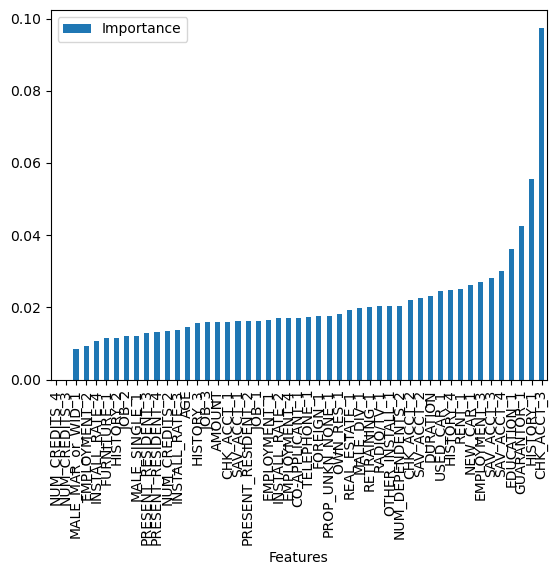

In [129]:
importance=model_pre.feature_importances_
df_importance=pd.DataFrame(data=[features, importance]).T
df_importance.columns=['Features', 'Importance']
df_importance.sort_values(by=['Importance'], ascending=True, inplace=True)
df_importance.plot.bar(x='Features', y='Importance')
df_importance

# Feature selection

In [130]:
from sklearn.feature_selection import SelectFromModel

clf = SelectFromModel(model_pre, prefit=True, threshold=0.01)
X_reduced = clf.transform(X)
# print(X_reduced.shape)
# type(X_reduced)
row, col=X_reduced.shape
print(col)
# df_reduced=pd.DataFrame(X_reduced)
# df_reduced=pd.concat([df_reduced, y], axis=1)
# df_reduced

45


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [131]:
row=col*(-1)
features_selected=df_importance.iloc[row:,:]['Features'].tolist()
features_selected

['INSTALL_RATE_4',
 'FURNITURE_1',
 'HISTORY_2',
 'JOB_2',
 'MALE_SINGLE_1',
 'PRESENT_RESIDENT_3',
 'PRESENT_RESIDENT_4',
 'NUM_CREDITS_2',
 'INSTALL_RATE_3',
 'AGE',
 'HISTORY_3',
 'JOB_3',
 'AMOUNT',
 'CHK_ACCT_1',
 'SAV_ACCT_1',
 'PRESENT_RESIDENT_2',
 'JOB_1',
 'EMPLOYMENT_1',
 'INSTALL_RATE_2',
 'EMPLOYMENT_4',
 'CO-APPLICANT_1',
 'TELEPHONE_1',
 'FOREIGN_1',
 'PROP_UNKN_NONE_1',
 'OWN_RES_1',
 'REAL_ESTATE_1',
 'MALE_DIV_1',
 'RETRAINING_1',
 'RADIO/TV_1',
 'OTHER_INSTALL_1',
 'NUM_DEPENDENTS_2',
 'CHK_ACCT_2',
 'SAV_ACCT_2',
 'DURATION',
 'USED_CAR_1',
 'HISTORY_4',
 'RENT_1',
 'NEW_CAR_1',
 'EMPLOYMENT_3',
 'SAV_ACCT_3',
 'SAV_ACCT_4',
 'EDUCATION_1',
 'GUARANTOR_1',
 'HISTORY_1',
 'CHK_ACCT_3']

# Train test split

In [132]:
np.random.seed(1)
Train, Test=train_test_split(df_norm, test_size=0.4, random_state=1)
Train_X=Train[features_selected]
Train_y=Train[target]
Test_X=Test[features_selected]
Test_y=Test[target]

# Training

In [133]:
model=XGBClassifier(n_estimators=200)
model=model.fit(Train_X, Train_y)

In [134]:
y_pred=model.predict(Train_X)
print('Accuracy Score: ', metrics.accuracy_score(y_pred, Train_y))

Accuracy Score:  1.0


1.0


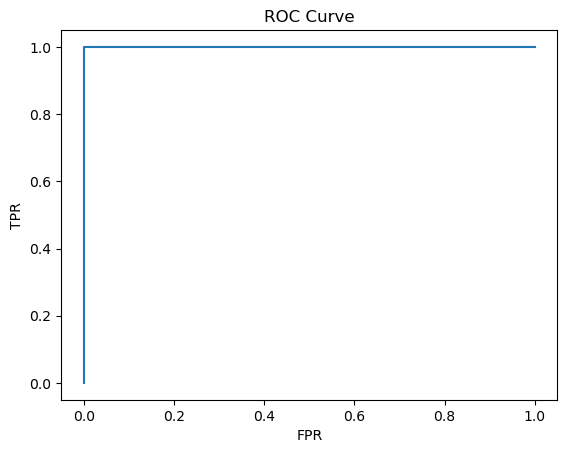

In [135]:
y_prob=model.predict_proba(Train_X)
print(roc_auc_score(Train_y, y_prob[:, 1]))
fpr, tpr, _=roc_curve(Train_y, y_prob[:, 1])
pyplot.clf()
pyplot.plot(fpr, tpr)
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.title('ROC Curve')
pyplot.show()

# Testing

In [136]:
y_pred=model.predict(Test_X)
print('Accuracy Score: ', metrics.accuracy_score(y_pred, Test_y))

Accuracy Score:  0.73


0.7402593440122044


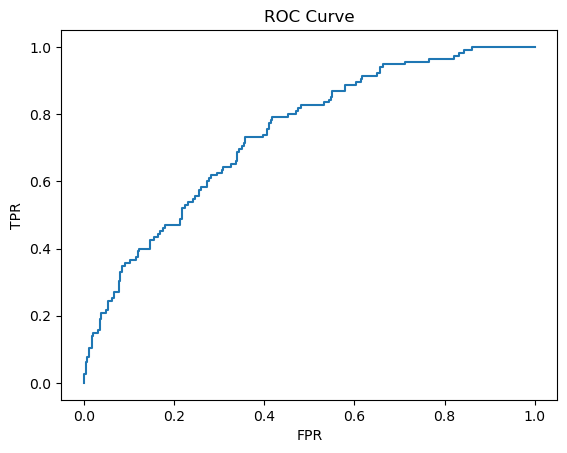

In [137]:
y_prob=model.predict_proba(Test_X)
print(roc_auc_score(Test_y, y_prob[:, 1]))
fpr, tpr, _=roc_curve(Test_y, y_prob[:, 1])
pyplot.clf()
pyplot.plot(fpr, tpr)
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.title('ROC Curve')
pyplot.show()

# K-Fold Cross-Validation

In [138]:
from sklearn.model_selection import KFold
Test_X_array=Test_X.to_numpy()
Test_y_array=Test_y.to_numpy()
j=1
kf = KFold(n_splits=5,random_state=1,shuffle=True)
accuracy = []
for train_index,test_index in kf.split(Test_X, Test_y):
            print('\n{} of kfold {}'.format(j,kf.n_splits))
            xtr,xvl = Test_X_array[train_index],Test_X_array[test_index]     
            ytr,yvl = Test_y_array[train_index],Test_y_array[test_index]         
            model = XGBClassifier(random_state=1)     
            model.fit(xtr, ytr)     
            pred_test = model.predict(xvl)     
            score = accuracy_score(yvl,pred_test)
            accuracy.append(score)
            print('accuracy_score',score)
            j=j+1
print('\n Average accuracy_score:', np.mean(accuracy))


1 of kfold 5
accuracy_score 0.675

2 of kfold 5
accuracy_score 0.7125

3 of kfold 5
accuracy_score 0.725

4 of kfold 5
accuracy_score 0.7125

5 of kfold 5
accuracy_score 0.7625

 Average accuracy_score: 0.7175


# KS Test and Statistics

In [139]:
from scipy.stats import ks_2samp

def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    return ks.statistic, roc_auc

In [140]:
ks_good, auc_good = evaluate_ks_and_roc_auc(Test_y, y_prob)

KS: 0.3738 (p-value: 9.907e-11)
ROC AUC: 0.7403


In [141]:
df_ks=pd.DataFrame()
df_ks['target']=Test_y
df_ks['prob']=y_prob[:, 1]
df_ks

target      prob
507       1  0.221894
818       0  0.998336
452       0  0.024278
368       1  0.611516
242       1  0.728478
929       0  0.965161
262       0  0.111200
810       0  0.128675
318       0  0.002766
49        0  0.053315
446       1  0.959079
142       0  0.739308
968       0  0.383269
345       0  0.000074
971       0  0.216637
133       0  0.970126
104       0  0.000920
6         0  0.012163
600       0  0.000163
496       1  0.810737
702       0  0.095429
472       1  0.992045
598       1  0.063022
502       0  0.006806
433       0  0.335265
119       0  0.005364
108       0  0.936868
647       1  0.035165
589       1  0.000951
374       1  0.998981
910       0  0.530010
718       0  0.356798
744       0  0.455736
494       0  0.060199
404       0  0.034283
274       1  0.945270
78        0  0.000414
721       1  0.139800
644       0  0.051127
614       1  0.069819
872       0  0.382666
691       0  0.650554
90        0  0.000150
101       0  0.543189
94        0  0.106785
577       0  0.003450
537       0  0.001201
41        0  0.378177
453       0  0.002564
995       0  0.004587
713       0  0.002778
34        0  0.126178
639       1  0.933707
35        1  0.925701
148       0  0.928003
455       0  0.004274
885       1  0.873697
677       1  0.914875
486       0  0.001123
685       0  0.541372
307       1  0.961355
238       0  0.000325
395       0  0.078187
734       0  0.000008
822       1  0.363594
812       1  0.063590
464       0  0.378647
816       0  0.001260
528       1  0.994245
17        0  0.604512
709       0  0.005443
370       0  0.013649
241       0  0.000010
964       0  0.638725
457       1  0.004499
65        0  0.463716
191       1  0.055161
838       0  0.002692
331       1  0.010155
638       0  0.005811
255       0  0.021655
742       0  0.003222
756       0  0.002343
757       1  0.000912
951       1  0.652128
992       0  0.314672
463       0  0.476819
843       0  0.003597
573       0  0.987928
527       0  0.000005
654       0  0.000051
189       0  0.431696
517       1  0.060143
956       0  0.014287
414       1  0.991122
671       0  0.006765
559       1  0.343688
593       1  0.841532
258       0  0.002928
154       0  0.035819
335       1  0.000457
13        1  0.322954
911       1  0.187190
156       0  0.001545
428       0  0.158419
824       0  0.017241
267       0  0.003620
538       1  0.993468
236       1  0.514552
944       0  0.016376
479       0  0.000913
785       0  0.052471
950       0  0.001820
59        1  0.734732
868       0  0.688029
175       1  0.016901
711       1  0.258628
449       1  0.004613
120       1  0.981347
794       0  0.075096
180       1  0.500116
311       0  0.003837
3         0  0.715998
194       1  0.263987
437       0  0.000350
683       0  0.031011
799       0  0.139514
746       0  0.581849
625       0  0.004037
692       0  0.022342
551       0  0.001203
248       0  0.961712
659       0  0.049605
2         0  0.000017
997       0  0.004032
860       0  0.000136
776       0  0.000207
857       0  0.002219
358       0  0.000994
769       0  0.000012
73        0  0.075261
117       0  0.026571
938       1  0.960141
535       1  0.092405
111       0  0.491722
509       0  0.081423
512       0  0.009235
916       0  0.000386
555       1  0.740000
552       1  0.436118
354       0  0.005115
970       0  0.033693
8         0  0.000263
581       0  0.067518
56        1  0.160171
576       0  0.004514
705       0  0.424390
651       1  0.123571
84        0  0.004735
228       1  0.001041
159       0  0.000018
205       0  0.369522
125       0  0.661565
688       0  0.003870
887       1  0.992600
473       0  0.002290
244       0  0.047698
597       1  0.021063
797       0  0.125864
195       1  0.010761
202       0  0.415032
81        0  0.006950
484       0  0.000236
443       1  0.111142
578       1  0.677540
201       0  0.992960
186       1  0.090508
516       0  0.003035
821       0  0.012451
967       0  0.246650
216       0  0.247218
5

In [142]:
def ks_format(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [143]:
mydf_format = ks_format(data=df_ks,target='target', prob='prob')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.921001  0.999516      25         15     21.74%         5.26%   
2       0.581849  0.917608      20         20     17.39%         7.02%   
3       0.343688  0.566355      13         27     11.30%         9.47%   
4       0.139800  0.340936      15         25     13.04%         8.77%   
5       0.067518  0.139514      12         28     10.43%         9.82%   
6       0.024278  0.065940      10         30      8.70%        10.53%   
7       0.005940  0.023568       9         31      7.83%        10.88%   
8       0.002692  0.005864       6         34      5.22%        11.93%   
9       0.000457  0.002627       5         35      4.35%        12.28%   
10      0.000005  0.000425       0         40      0.00%        14.04%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             21.74

In [144]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum())
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum())
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [145]:
mydf = ks(data=df_ks,target='target', prob='prob')

        min_prob  max_prob  events  nonevents  event_rate  nonevent_rate  \
Decile                                                                     
1       0.921001  0.999516      25         15    0.217391       0.052632   
2       0.581849  0.917608      20         20    0.173913       0.070175   
3       0.343688  0.566355      13         27    0.113043       0.094737   
4       0.139800  0.340936      15         25    0.130435       0.087719   
5       0.067518  0.139514      12         28    0.104348       0.098246   
6       0.024278  0.065940      10         30    0.086957       0.105263   
7       0.005940  0.023568       9         31    0.078261       0.108772   
8       0.002692  0.005864       6         34    0.052174       0.119298   
9       0.000457  0.002627       5         35    0.043478       0.122807   
10      0.000005  0.000425       0         40    0.000000       0.140351   

        cum_eventrate  cum_noneventrate    KS  
Decile                                 

<AxesSubplot:xlabel='Decile'>

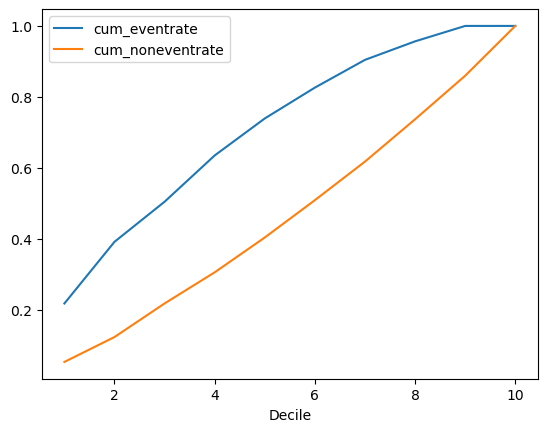

In [146]:
mydf.plot(y=['cum_eventrate', 'cum_noneventrate'])

# Model tuning from learning curve

In [147]:
model = XGBClassifier(n_estimators=200, eta=0.05, subsample=0.5, colsample_bytree=0.5)
# define the datasets to evaluate each iteration
evalset = [(Train_X, Train_y), (Test_X, Test_y)]
# fit the model
model.fit(Train_X, Train_y, eval_metric='logloss', eval_set=evalset)

[0]	validation_0-logloss:0.67682	validation_1-logloss:0.67827
[1]	validation_0-logloss:0.66295	validation_1-logloss:0.66884
[2]	validation_0-logloss:0.65146	validation_1-logloss:0.66173
[3]	validation_0-logloss:0.63741	validation_1-logloss:0.65079
[4]	validation_0-logloss:0.62693	validation_1-logloss:0.64472
[5]	validation_0-logloss:0.61601	validation_1-logloss:0.63830
[6]	validation_0-logloss:0.60573	validation_1-logloss:0.62948
[7]	validation_0-logloss:0.59724	validation_1-logloss:0.62169
[8]	validation_0-logloss:0.58949	validation_1-logloss:0.61604
[9]	validation_0-logloss:0.57869	validation_1-logloss:0.60916
[10]	validation_0-logloss:0.56837	validation_1-logloss:0.60023
[11]	validation_0-logloss:0.56009	validation_1-logloss:0.59290
[12]	validation_0-logloss:0.55416	validation_1-logloss:0.58937
[13]	validation_0-logloss:0.54761	validation_1-logloss:0.58583
[14]	validation_0-logloss:0.54040	validation_1-logloss:0.58023
[15]	validation_0-logloss:0.53346	validation_1-logloss:0.57622
[1

C:\Users\yfgon\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[71]	validation_0-logloss:0.34210	validation_1-logloss:0.50976
[72]	validation_0-logloss:0.34043	validation_1-logloss:0.50973
[73]	validation_0-logloss:0.33875	validation_1-logloss:0.51038
[74]	validation_0-logloss:0.33649	validation_1-logloss:0.51073
[75]	validation_0-logloss:0.33390	validation_1-logloss:0.51113
[76]	validation_0-logloss:0.33115	validation_1-logloss:0.51121
[77]	validation_0-logloss:0.32907	validation_1-logloss:0.51106
[78]	validation_0-logloss:0.32788	validation_1-logloss:0.51131
[79]	validation_0-logloss:0.32685	validation_1-logloss:0.51154
[80]	validation_0-logloss:0.32456	validation_1-logloss:0.51011
[81]	validation_0-logloss:0.32286	validation_1-logloss:0.51008
[82]	validation_0-logloss:0.31994	validation_1-logloss:0.51021
[83]	validation_0-logloss:0.31839	validation_1-logloss:0.50878
[84]	validation_0-logloss:0.31630	validation_1-logloss:0.50823
[85]	validation_0-logloss:0.31538	validation_1-logloss:0.50789
[86]	validation_0-logloss:0.31416	validation_1-logloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

Accuracy: 0.752


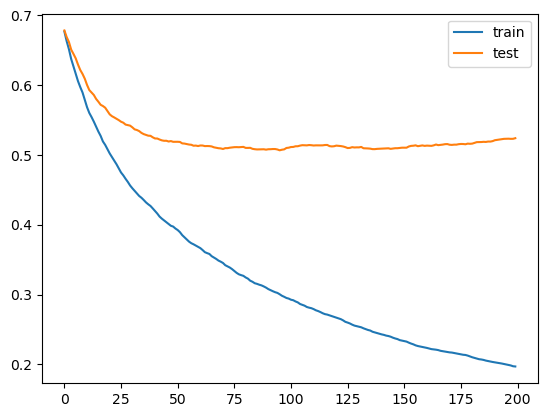

In [148]:
# evaluate performance
y_pred = model.predict(Test_X)
score = accuracy_score(Test_y, y_pred)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [149]:
# drop_first
s=pd.DataFrame()
s['col1']=pd.Series(list('abcdef'))
s['col2']=pd.Series(list('ghijkl'))
s
s=pd.get_dummies(s, drop_first=True)
s

col1_b  col1_c  col1_d  col1_e  ...  col2_i  col2_j  col2_k  col2_l
0       0       0       0       0  ...       0       0       0       0
1       1       0       0       0  ...       0       0       0       0
2       0       1       0       0  ...       1       0       0       0
3       0       0       1       0  ...       0       1       0       0
4       0       0       0       1  ...       0       0       1       0
5       0       0       0       0  ...       0       0       0       1

[6 rows x 10 columns]